In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
df = pd.read_pickle('berlinmod/san_francisco.pkl')

In [3]:
df.shape

(16723, 3)

In [4]:
df.head(10)

longitude  latitude  trip
Moid time                                              
1    2008-05-16 00:00:00.000    17.9913   47.3219     1
     2008-05-17 19:48:27.568    17.9991   47.3166     1
     2008-05-18 11:00:33.495    17.9991   47.3166     1
     2008-05-21 21:10:50.015    17.9991   47.3166     2
     2008-05-21 21:10:50.016    17.9885   47.3126     3
     2008-05-22 09:58:32.771    17.9991   47.3166     3
     2008-05-27 21:08:08.313    18.0028   47.3118     3
     2008-05-28 08:32:22.781    17.9991   47.3166     3
     2008-05-28 20:15:47.129    17.9900   47.3233     3
     2008-05-31 09:29:38.004    17.9991   47.3166     3

In [5]:
df.index.unique(0).shape

(536,)

In [6]:
df['trip'].unique().shape

(6928,)

In [7]:
df['latitude'].describe()

count    16723.000000
mean        47.315901
std          0.004646
min         47.292900
25%         47.311800
50%         47.315900
75%         47.317600
max         47.341900
Name: latitude, dtype: float64

In [8]:
df['longitude'].describe()

count    16723.000000
mean        17.993387
std          0.008897
min         17.947500
25%         17.988800
50%         17.991300
75%         17.999100
max         18.049400
Name: longitude, dtype: float64

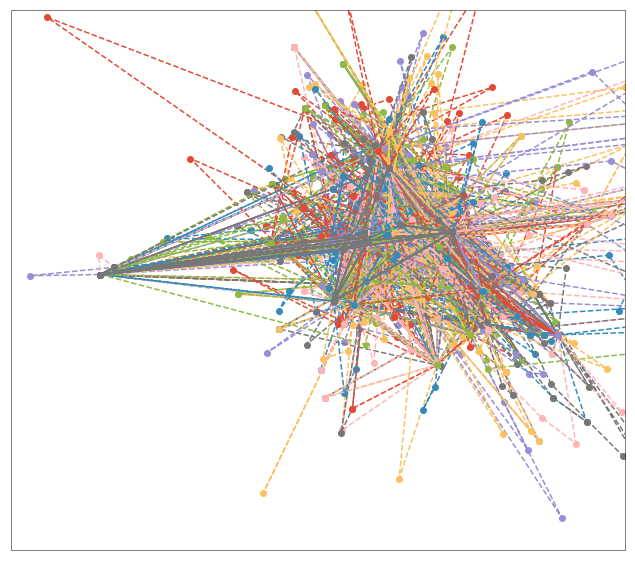

In [9]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
#ax.set_extent((9.8457000, 9.8852000, 53.2732000, 53.29710005))
#ax.set_extent((17.9836000, 18.0123000, 47.3096000, 47.3265000))
#ax.set_extent((df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()))
#ax.set_extent((17.956100, 18.002500, 47.313100, 47.319200))
ax.set_extent((17.945147, 18.0201297, 47.2902535, 47.334994))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for moid in df.index.levels[0]:
    lats = df.loc[moid]['latitude']
    lons = df.loc[moid]['longitude']
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())